In [1]:
pip install os-sys

     |████████████████████████████████| 15.6 MB 839 kB/s eta 0:00:01
     |████████████████████████████████| 265 kB 71.5 MB/s eta 0:00:01
     |████████████████████████████████| 8.1 MB 69.1 MB/s eta 0:00:01
     |████████████████████████████████| 225 kB 69.3 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 27.0 MB/s eta 0:00:01
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... - \ | / - \ | / - \ | / - \ | / - \ done
    Preparing wheel metadata ... - done
     |████████████████████████████████| 11.9 MB 72.3 MB/s eta 0:00:01
     |████████████████████████████████| 38.6 MB 197 kB/s  eta 0:00:01
ERROR: Could not find a version that satisfies the requirement text-editor (from os-sys) (from versions: none)
ERROR: No matching distribution found for text-editor (from os-sys)
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install opencv-python

     |████████████████████████████████| 60.9 MB 87.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torch==1.9.0

     |████████████████████████████████| 831.4 MB 2.6 kB/s  eta 0:00:015
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0
    Uninstalling torch-1.12.0:
      Successfully uninstalled torch-1.12.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torchvision==0.10.0

     |████████████████████████████████| 22.1 MB 851 kB/s eta 0:00:01
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.9.1
    Uninstalling torchvision-0.9.1:
      Successfully uninstalled torchvision-0.9.1
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install detecto

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from detecto.core import Dataset
from detecto.utils import read_image
from detecto.utils import xml_to_csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import shutil
import sys
import torch
from torchvision import transforms

In [6]:
base_path=os.getcwd()

In [7]:
TRAIN_PATH = os.path.abspath(os.path.join('train'))
TRAIN_LABEL_PATH = os.path.abspath(os.path.join('train_labels_final.csv'))
TEST_PATH = os.path.abspath(os.path.join('test'))
TEST_LABEL_PATH = os.path.abspath(os.path.join('test_labels_final.csv'))

In [8]:
Train_dataset = core.Dataset(TRAIN_LABEL_PATH,TRAIN_PATH)
Test_dataset = core.Dataset(TEST_LABEL_PATH,TEST_PATH)

In [9]:
classes_list_df=pd.read_csv('Classes_List.csv')
classes_list=list(classes_list_df['filename'])

In [10]:
len(classes_list)

562

In [11]:
TEST_LABEL_PATH

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/calorietracker/code/Users/cb.sc.i5das18040/test_labels_final.csv'

In [13]:

old_stdout = sys.stdout
log_file = open("message.log","w")
sys.stdout = log_file
torch.cuda.empty_cache()
loader=core.DataLoader(Train_dataset, batch_size=1, shuffle=True)#L3
model = core.Model(classes_list)
try:
    losses = model.fit(loader, Test_dataset, epochs=4, lr_step_size=5, learning_rate=0.0001, verbose=True)
    model.save('model_weightsfinal2.pth')
except KeyboardInterrupt:
    model.save('model_weightsfinal1.pth')
sys.stdout = old_stdout
log_file.close()

 59%|█████▊    | 16288/27748 [1:47:18<1:23:49,  2.28it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
 91%|█████████ | 25276/27748 [2:46:26<16:04,  2.56it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
 52%|█████▏    | 14360/27748 [1:34:01<1:44:23,  2.14it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
  9%|▉         | 2452/27748 [15:57<2:48:15,  2.51it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
100%|██████████| 7188/7188 [30:50<00:00,  3.88it/s]


In [14]:
old_stdout = sys.stdout
log_file = open("message2.log","w")
sys.stdout = log_file
torch.cuda.empty_cache()
try:
    loader=core.DataLoader(Train_dataset, batch_size=1, shuffle=True)
    losses = model.fit(loader, Test_dataset, epochs=10, lr_step_size=5, learning_rate=0.001, verbose=True)
    model.save('model_weightsfinal4.pth')
except KeyboardInterrupt:
    model.save('model_weightsfinal3.pth')
sys.stdout = old_stdout
log_file.close()

 83%|████████▎ | 11509/13874 [2:36:51<32:32,  1.21it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
 43%|████▎     | 5930/13874 [1:20:49<1:53:14,  1.17it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
 85%|████████▌ | 11808/13874 [2:43:18<27:41,  1.24it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
 13%|█▎        | 1800/13874 [24:52<2:42:58,  1.23it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
 46%|████▌     | 6391/13874 [1:28:42<1:41:53,  1.22it/s]

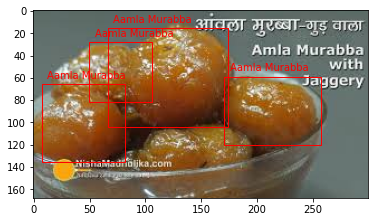

In [35]:
image=utils.read_image(TEST_PATH+'Aamla Murabba 25.jpg')
predictions = model.predict(image)
labels, boxes, scores = predictions
show_labeled_image(image, boxes[0:12], labels[0:12])

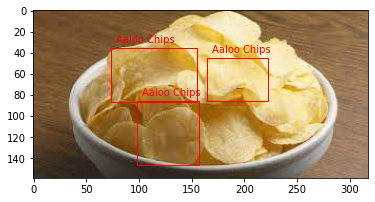

In [42]:
image=utils.read_image(test_dir_1+"Aaloo Chips 31.jpeg")
predictions = model.predict(image)
labels, boxes, scores = predictions
show_labeled_image(image, boxes[0:12], labels[0:12])

In [43]:
print(labels)
print(boxes)
print(scores)

['Aaloo Chips', 'Aaloo Chips', 'Aaloo Chips']
tensor([[ 98.1575,  85.5081, 157.4206, 145.9293],
        [ 73.2364,  35.3226, 154.9814,  86.0684],
        [164.6031,  44.9310, 222.9315,  85.4577]])
tensor([0.5175, 0.5158, 0.1958])


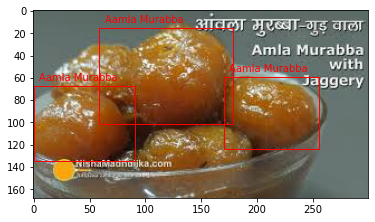

In [44]:
image=utils.read_image(test_dir_2+'Aamla Murabba 25.jpg')
predictions = model.predict(image)
labels, boxes, scores = predictions
show_labeled_image(image, boxes[0:12], labels[0:12])

In [45]:
print(labels)
print(boxes)
print(scores)

['Aamla Murabba', 'Aamla Murabba', 'Aamla Murabba']
tensor([[ 58.7324,  15.5977, 178.4991, 101.7926],
        [170.0727,  59.1502, 255.5420, 123.3514],
        [  0.0000,  67.2139,  90.8883, 134.2693]])
tensor([0.9275, 0.8422, 0.6410])
